In [13]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
from icecream import ic

In [20]:
image_path = "./Image"
mask_path = "./Mask"
image_list = sorted(os.listdir(image_path))
mask_list = sorted(os.listdir(mask_path))

In [24]:
# load images and masks
def load_images(image_list, mask_list):
    images = []
    masks = []
    for i in range(len(image_list)):
        image = plt.imread(os.path.join(image_path, image_list[i]))
        mask = plt.imread(os.path.join(mask_path, mask_list[i]))
        images.append(image)
        masks.append(mask)
    return images, masks
images, masks = load_images(image_list, mask_list)

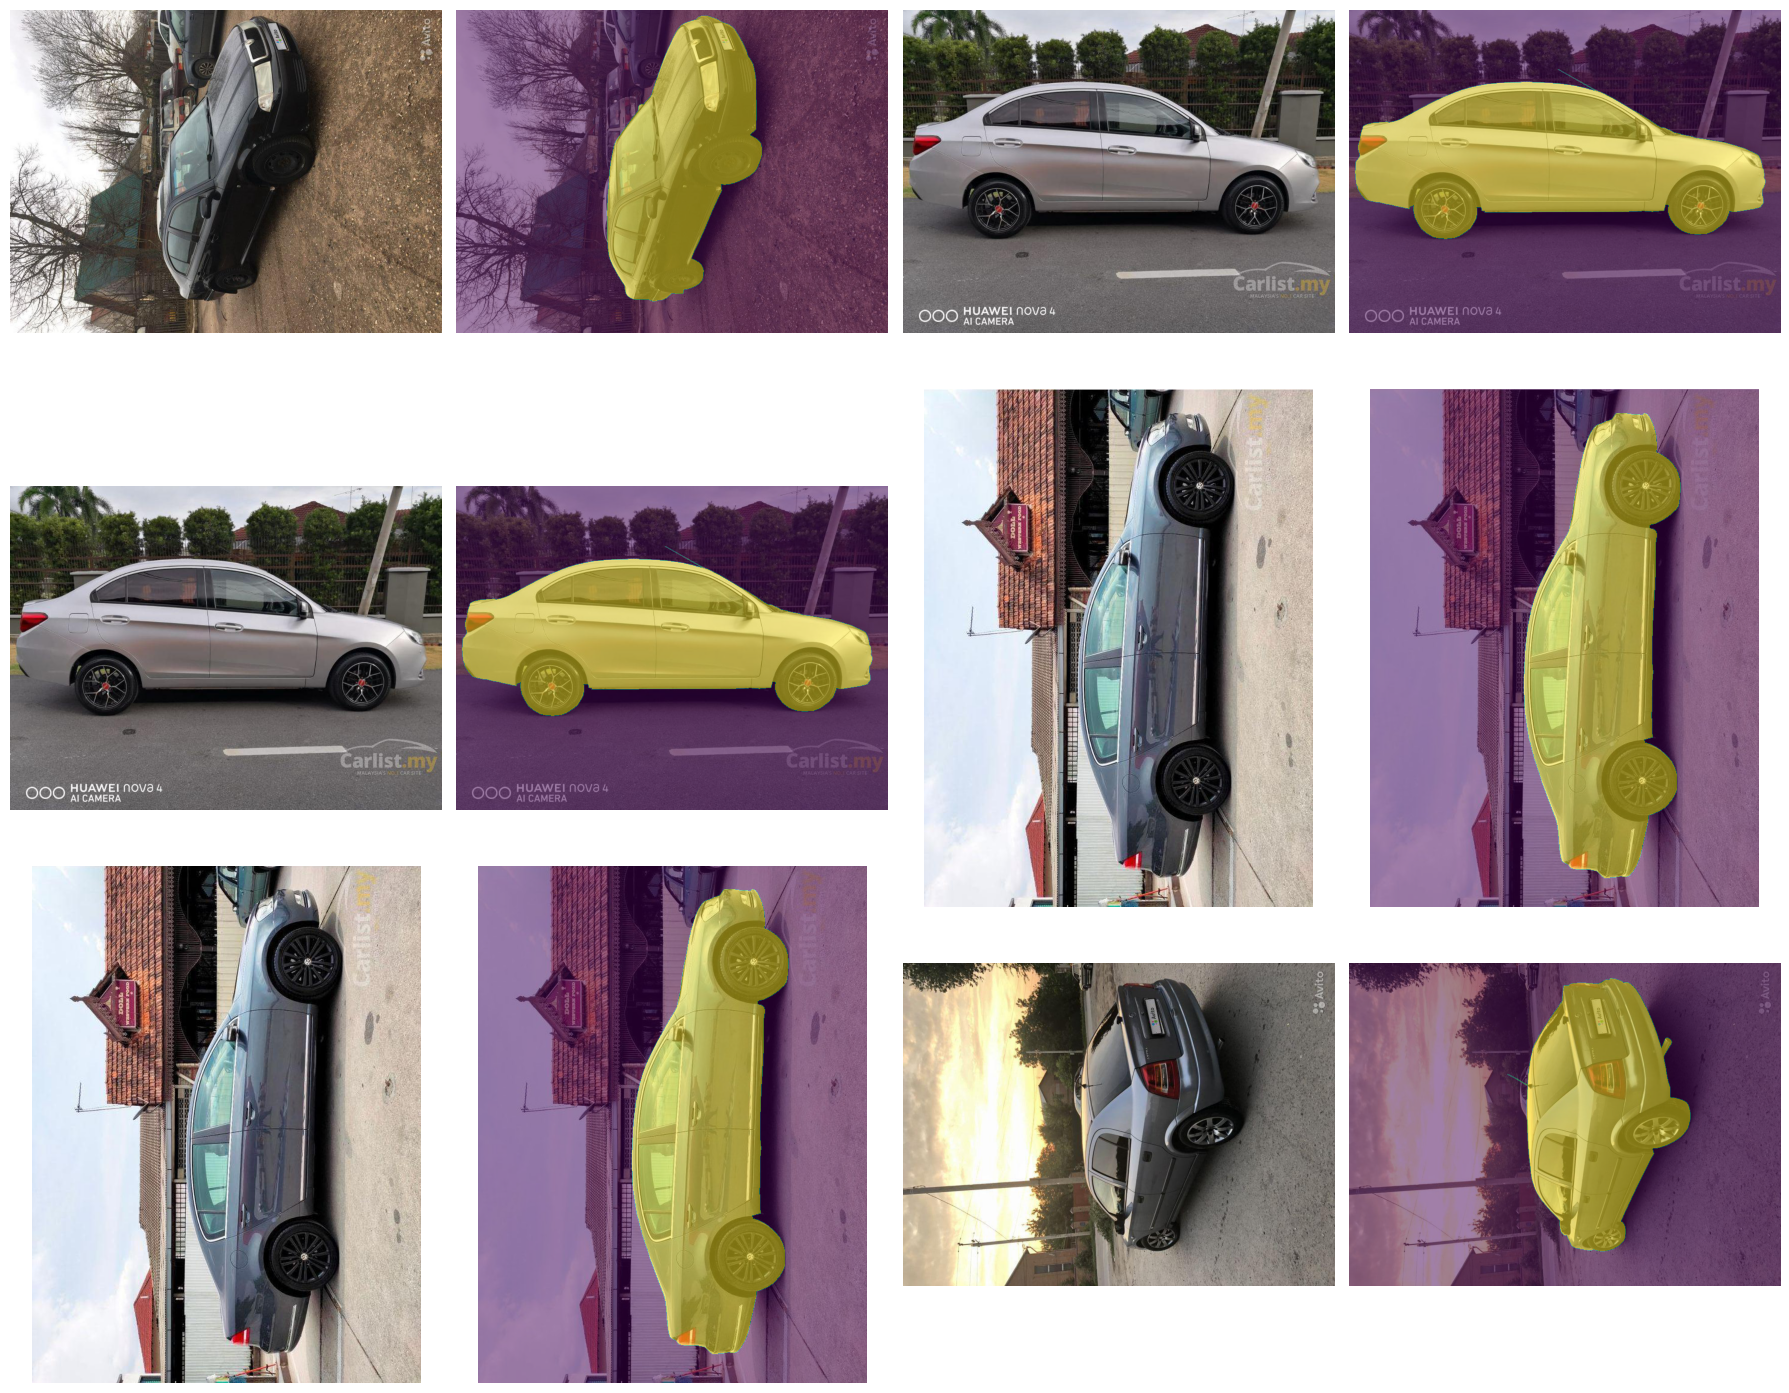

In [46]:
# plot images and masked images
def plot_images(images, masks):
    nums = 3             # max 10
    fig, axs = plt.subplots(nums, 4, figsize=(18, 15))  # Increase figure size
    for i in range(nums):
        for j in range(4):
            axs[i, j].axis('off')  # Hide the axes
        axs[i,0].imshow(images[i])
        axs[i,1].imshow(images[i])
        axs[i,1].imshow(masks[i], alpha=0.5)
        axs[i,2].imshow(images[i+1])
        axs[i,3].imshow(images[i+1])
        axs[i,3].imshow(masks[i+1], alpha=0.5)
    plt.tight_layout()
    plt.show()

plot_images(images, masks)

In [49]:
# load image in Dataset
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

img_height, img_width = 320, 320
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((img_height, img_width), interpolation=transforms.InterpolationMode.BICUBIC),
])

class ImageDataset(Dataset):
    def __init__(self, images, masks, transform=None):
        self.images = images
        self.masks = masks
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        image = self.images[idx]
        mask = self.masks[idx]
        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)
        return image, mask

dataset = ImageDataset(images, masks, transform)

In [51]:
# split dataset into train and test and create DataLoader
from sklearn.model_selection import train_test_split
train_size = 0.8
train_dataset, test_dataset = train_test_split(dataset, train_size=train_size, shuffle=True)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=2, shuffle=True)